# Modelo de Rozemberg 02/04/22

### Comienzo del programa
***
Se importan las librerías de las funciones a utilizar durante el programa:

In [7]:
import numpy as np
import matplotlib.pyplot as plt

### Parametros iniciales del programa
***
Se definen los valores y datos a utilizar para el desarrollo del problema. Donde se tiene:

* **_n_**   : tamaño total de la muestra (bines)
* **_nc_**  : tamaño de la zona de los contactos
* **_di(i)_**   : densidad en el sitio i
* **_rho(i)_**  : resistividad en el sitio i
* **_delta(i)_**: cambio de densidad del sitio i
* **_vb(i)_**: movilidad de cada sitio i
* **_v(i)_** : potencial de cada sitio i
* **_vtotal, i_total_**: potencial total y corriente


In [61]:
###Definicion de mis variabales en Python
cant_bines= 100                #Parametro para variar ext de las listas
n = list(range(0,cant_bines))  #Listado de tamaño total de la muestra
vb= list(range(0,cant_bines))  #Listado - movilidad de cada sitio i

Vba=16                         #Parametros - movilidad en extremos
Vbb=14
#width=0

nc1= 10                        #Parametro - tamaño del extremo 1
nc2= 10                        #Parametro - tamaño del extremo 2
#Otras variables las defino a medida que las requiero --> ordenar

In [ ]:
### Referencia Variables Fortran
'''
!--- Parametros iniciales del programa
!---   n   = tamanyo total de la muestra
!---   nb  = tamanyo de la zona de los contactos 
!---   npr = indices de impresion
!---   epsil = numero chiquito para comparacion con cero
       integer n, nb, npr
       double precision epsil
       parameter (n=99, nb= 10, npr=1, epsil=1.d-06)
!--- di(i)   : densidad en el sitio i
!--- rho(i)  : resistividad en el sitio i
!--- delta(i): cambio de densidad del sitio i
       double precision di(0:n+1),rho(0:n+1),delta(n)
       double precision deltap(n),deltam(n)
       double precision piip1(n),piim1(n),pim1i(n),pip1i(n)
!--- vb(i): movilidad de cada sitio i
!--- v(i) : potencial de cada sitio i
!--- vtotal, i_total: potencial total y corriente
       double precision v(0:n+1),vb(0:n+1),vtotal,i_total
       double precision dtot,rhotot,rhoizq,rhoder
       double precision dvisum,dvi,dvim1,dvip1
       double precision Vba,Vbb,v0,xm
       double precision fac_izq,fac_cent,fac_der,width
       integer nt
       integer i
       integer tau,it,ntp,nper
!--- Archivos con diversas salidas
       open (61, file = "d_i.dat")
       open (62, file = "rho_i.dat")
       open (63, file = "r_inic.dat")
       open (64, file = "rhotot.dat")
       open (65, file = "rhoizq.dat")
       open (66, file = "rhoder.dat")
       open (67, file = "i_v.dat")
'''

### Parametros de movilidad de los contactos
***
* Vba y Vbb: parametros de movilidad de los contactos (Vba) y del volumen (Vbb)
* En este caso Vba=/=Vbb
* El perfil de vb(i) puede ser suave o abrupto (si width==0)
      

Text(0.5, 1.0, 'Parametros de movilidad de los contactos')

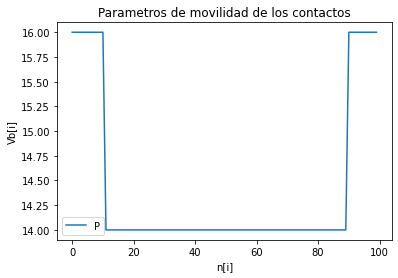

In [62]:
for i in n:
    if i <= nc1:
        vb[i]=Vba
    elif i >=len(n)-nc2:   #obtengo long de la lista n
        vb[i]=Vba
    else:
        vb[i]=Vbb
#print(n)

plt.plot(n, vb)
plt.legend('Parametros de movilidad de los contactos')
plt.xlabel('n[i]')
plt.ylabel('Vb[i]')
plt.title('Parametros de movilidad de los contactos')


### Parametros que definen las rampas de potencial
***

In [16]:
PENDIENTE
''' 
tau=  #longitud de cada ciclo
v0=   #altura maxima de la rampa
nper= #numero de ciclos

       xm=4.d0*v0/tau
       nt=0
       do ntp=1,nper
         if(mod(ntp,npr)==0 ) then
           write (64,'(a20)') ' '
           write (65,'(a20)') ' '
           write (66,'(a20)') ' '
           write (67,'(a20)') ' '
         endif
         do it=1,tau
           nt=nt+1
           if(it.le.tau/4) then
             vtotal= xm*it
           elseif( (it.gt.tau/4) .and. (it.lt.tau*3/4) ) then
             vtotal= 2.d0*v0-xm*it
           else
             vtotal= -4.d0*v0+xm*it
           endif

#La resistividad de cada sitio se define como R(i)=fac(i)*di(i)
#fac son las constantes en cada sector de la muestra
#width es el ancho de transicion entre una zona y otra, es util para hacer el cambio de resistividad mas suave

fac_izq=
fac_cent=
fac_der=
width=

' \n!---  tau : longitud de cada ciclo\n!---  v0  : altura maxima de la rampa\n!---  nper: numero de ciclos\n       read(5,*) tau,v0,nper\n!--- La resistividad de cada sitio se define como R(i)=fac(i)*di(i)\n!---  fac_* son las constantes en cada sector de la muestra\n!---  width es el ancho de transicion entre una zona y otra\n!---        es util para hacer el cambio de resistividad mas suave\n       read(5,*) fac_izq,fac_cent,fac_der,width'

### Densidad de vacancias inicial y total
***
* La densidad de vacancias iniciales se setean en cero
* La densidad de vacancias total sera la sumatoria de todas las vacancias locales

In [59]:
di= list(range(0,cant_bines)) 

#Densidad de vacancias inicial --> 0
for i in n:
    di[i]=0
    

#plt.plot(n, di)
#plt.legend('Densidad de vacancias inicial')
#plt.xlabel('n[i]')
#plt.ylabel('di[i]')
#plt.title('Densidad de vacancias inicial')

#Densidad de vacancias total
dtot=0
for i in n:
    dtot+=di[i]

### Resistividad local
***
Se determina la resistividad local inicial  

*Fact* son constantes en cada sector de la muestra  
La resistividad de cada sitio se define como   
                R(i)=fac(i)*di(i)

In [63]:

fac_izq = 10
fac_der = 10
fac_cent= 5

for i in n:
    if i <= nc1:
        rho[i]=fac_izq*di[i]
    elif i >=len(n)-nc2:
        rho[i]=fac_der*di[i]
    else:
        rho[i]=fac_cent*di[i]

        '''do i=1,n
             if(width > 0) then 
               rho(i)=(fac_cent)+
     .    (fac_izq-fac_cent)/(1.d0+dexp((dble(i)-nb)/width))+
     .    (fac_der-fac_cent)/(1.d0+dexp((dble(n)-dble(i)-(nb-1))/width))
             else
               if( i.lt.(nb+1)) then
                 rho(i)=(fac_izq)
               elseif( i.gt.(n-nb)) then
                 rho(i)=(fac_der)
               else
                 rho(i)=(fac_cent)
               endif
             endif
             if(nt.eq.1) write(63,'(i5,f12.6)') i,rho(i)
             rho(i)=rho(i)*di(i)
           enddo'''

### Resistividades totales
***
Se determina la resistividad total a izquierda y a derecha

In [64]:
rhotot=0 ##Resistencia total
rhoizq=0 ##Resistencia izquierda
rhoder=0 ##Resistencia derecha

rho= list(range(0,100))
          
for i in n:
    rhotot= rhotot+rho[i]
    if i <= nc1+1:
        rhoizq = rhoizq + rho[i]
    if i>=len(n)-nc2:
        rhoder = rhoder + rho[i]


### Resistencias y corriente total
***



In [ ]:
##Impresion de resistencias y corriente total
i_total= vtotal/rhotot  ##Corriente total
vtotal= ##DE DONDE SALE??

           '''if(mod(ntp,npr)==0 ) then
             i_total=vtotal/rhotot
             write (64,'(6f18.6)') vtotal,rhotot
             write (65,'(6f18.6)') vtotal,rhoizq
             write (66,'(6f18.6)') vtotal,rhoder
             write (67,'(6f18.6)') vtotal,i_total,rhotot,rhoizq,rhoder
           endif
             
           dvisum=0.d0
           do i=1,n
             dvi= vtotal*rho(i)/rhotot
             dvisum=dvi+dvisum
             v(i)=vtotal-dvisum
           enddo

           v(0)=vtotal
           v(n+1)=0.d0'''

### Calculo de las probabilidades de transicion entre sitios
***


In [39]:
##Calculo de las probabilidades de transicion entre sitios

delta= list(range(0,100))
piip1= list(range(0,100))
pip1i= list(range(0,100))
piim1= list(range(0,100))
pim1i= list(range(0,100))

vtotal=0

for i in n:
    delta[i]=0

for i in n:
    dvi= vtotal* rho[i]/rhotot
    dvim1= vtotal* rho[i-1]/rhotot
    dvip1= vtotal* rho[i+1]/rhotot
    piip1[i]= di[i]  *(1.- di[i+1])* exp(-vb[i]  +dvi/2  )
    pip1i[i]= di[i+1]*(1.-di[i])   * exp(-vb[i+1]-dvip1/2)
    piim1[i]= di[i]  *(1.- di[i-1])* exp(-vb[i]  -dvi/2  )
    pim1i[i]= di[i-1]*(1.-di[i])   * exp(-vb[i-1]+dvim1/2)

##Se anulan migraciones desde y hacia los electrodos

    pim1i[0]=0
    piim1[0]=0
    piip1[100]=0
    pip1i[100]=0
    
''' !--- Se calcula la variacion en densidad en cada sitio
!---   delta(i)= pim1i(i)+pip1i(i) - (piip1(i)+piim1(i))
!--- se tienen en cuenta los limites de migracion: 0 y 1
!--- (no seria trascendente para los niveles manejados: 1.d-4)
             deltap(i)  = piip1(i)-pip1i(i)
             deltam(i)  = piim1(i)-pim1i(i)
             if(deltap(i).gt.0.d0) then
                deltap(i)= min(deltap(i),di(i),1.d0-di(i+1))
             else
                deltap(i)=-min(-deltap(i),di(i+1),1.d0-di(i))
             endif
             if(deltam(i).gt.0.d0) then
                deltam(i)= min(deltam(i),di(i),1.d0-di(i-1))
             else
                deltam(i)=-min(-deltam(i),di(i-1),1.d0-di(i))
             endif
             delta(i)=deltap(i)+deltam(i)
           enddo
 '''
##Se actualiza la densidad local de vacancias, di(i)
for i in n:
    di[i]=di[i]-delta[i]

NameError: name 'rho' is not defined